<a href="https://colab.research.google.com/github/Israelchguevara/Python-/blob/main/Juego_de_Adivinanza_Python_B%C3%A1sico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Juego de Adivinanza - Python Básico  


## Paso 1: Importar librerías necesarias

In [ ]:

import random
import os
from openpyxl import Workbook, load_workbook
import matplotlib.pyplot as plt


## Paso 2: Definir archivo Excel

In [ ]:

EXCEL_FILE = "resultados.xlsx"


## Paso 3: Crear el archivo Excel inicial si no existe

In [ ]:

def inicializar_excel():
    """
    Crea el archivo Excel con una hoja 'RESUMEN'
    y las columnas Nivel, Victorias y Derrotas.
    """
    if not os.path.exists(EXCEL_FILE):
        wb = Workbook()
        ws = wb.active
        ws.title = "RESUMEN"
        ws.append(["Nivel", "Victorias", "Derrotas"])
        ws.append(["Fácil", 0, 0])
        ws.append(["Medio", 0, 0])
        ws.append(["Difícil", 0, 0])
        wb.save(EXCEL_FILE)


## Paso 4: Función para actualizar resultados

In [ ]:

def actualizar_resultados(nivel, victoria):
    """
    Suma una victoria o una derrota al nivel indicado.
    """
    wb = load_workbook(EXCEL_FILE)
    ws = wb["RESUMEN"]
    for row in ws.iter_rows(min_row=2, max_row=4):
        if row[0].value == nivel:
            if victoria:
                row[1].value += 1
            else:
                row[2].value += 1
    wb.save(EXCEL_FILE)


## Paso 5: Función para mostrar resumen

In [ ]:

def mostrar_resumen():
    """
    Lee el archivo Excel y muestra cuántas victorias
    y derrotas hay en cada nivel.
    """
    wb = load_workbook(EXCEL_FILE)
    ws = wb["RESUMEN"]
    print("\nRESUMEN DE PARTIDAS")
    print("---------------------")
    for row in ws.iter_rows(min_row=2, max_row=4):
        print(f"{row[0].value}: Victorias={row[1].value}, Derrotas={row[2].value}")


## Paso 6: Función para mostrar gráficas

In [ ]:

def mostrar_grafica():
    """
    Dibuja un gráfico de barras con victorias y derrotas
    para cada nivel.
    """
    wb = load_workbook(EXCEL_FILE)
    ws = wb["RESUMEN"]
    niveles, victorias, derrotas = [], [], []
    for row in ws.iter_rows(min_row=2, max_row=4):
        niveles.append(row[0].value)
        victorias.append(row[1].value)
        derrotas.append(row[2].value)

    plt.bar(niveles, victorias, label="Victorias")
    plt.bar(niveles, derrotas, bottom=victorias, label="Derrotas")
    plt.legend()
    plt.title("Resultados por Nivel")
    plt.show()


## Paso 7: Función para jugar una partida

In [ ]:

def jugar():
    """
    Ejecuta una partida:
    - Permite elegir dificultad.
    - Genera un número aleatorio.
    - Da pistas (mayor/menor).
    - Guarda el resultado en el Excel.
    """
    print("\nSelecciona dificultad:")
    print("1. Fácil (15 intentos)")
    print("2. Medio (10 intentos)")
    print("3. Difícil (5 intentos)")
    opcion = input("Elige (1/2/3): ")

    if opcion == "1":
        nivel, intentos = "Fácil", 15
    elif opcion == "2":
        nivel, intentos = "Medio", 10
    elif opcion == "3":
        nivel, intentos = "Difícil", 5
    else:
        print("Opción inválida, se usará Medio por defecto")
        nivel, intentos = "Medio", 10

    numero = random.randint(0, 1000)
    print(f"\nAdivina el número entre 0 y 1000. Tienes {intentos} intentos.")

    for i in range(intentos):
        intento = int(input(f"Intento {i+1}: "))
        if intento == numero:
            print("Ganaste!")
            actualizar_resultados(nivel, True)
            return
        elif intento < numero:
            print("El número es mayor.")
        else:
            print("El número es menor.")

    print(f"Perdiste. El número era {numero}")
    actualizar_resultados(nivel, False)


## Paso 8: Menú principal


--- MENÚ PRINCIPAL ---
1. Jugar
2. Ver resumen
3. Ver gráficas
4. Salir

RESUMEN DE PARTIDAS
---------------------
Fácil: Victorias=1, Derrotas=0
Medio: Victorias=0, Derrotas=0
Difícil: Victorias=0, Derrotas=0

--- MENÚ PRINCIPAL ---
1. Jugar
2. Ver resumen
3. Ver gráficas
4. Salir

Selecciona dificultad:
1. Fácil (15 intentos)
2. Medio (10 intentos)
3. Difícil (5 intentos)

Adivina el número entre 0 y 1000. Tienes 5 intentos.
El número es menor.
El número es menor.
El número es mayor.
El número es mayor.
El número es mayor.
Perdiste. El número era 486

--- MENÚ PRINCIPAL ---
1. Jugar
2. Ver resumen
3. Ver gráficas
4. Salir


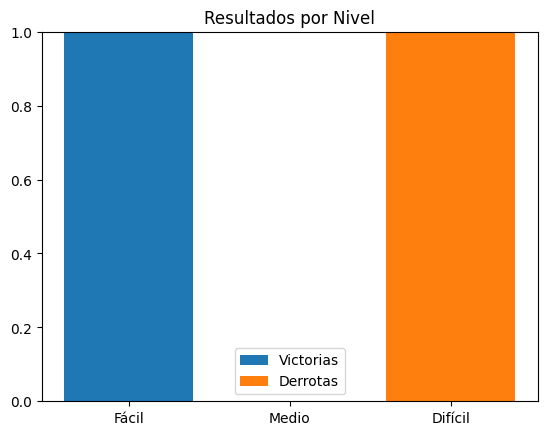


--- MENÚ PRINCIPAL ---
1. Jugar
2. Ver resumen
3. Ver gráficas
4. Salir


In [ ]:

inicializar_excel()  # Asegurar que el Excel exista

while True:
    print("\n--- MENÚ PRINCIPAL ---")
    print("1. Jugar")
    print("2. Ver resumen")
    print("3. Ver gráficas")
    print("4. Salir")
    opcion = input("Elige una opción: ")

    if opcion == "1":
        jugar()
    elif opcion == "2":
        mostrar_resumen()
    elif opcion == "3":
        mostrar_grafica()
    elif opcion == "4":
        print("Adiós!")
        break
    else:
        print("Opción no válida.")
